In [1]:
!pip install xgboost

In [0]:
from google.colab import files

In [0]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,12]

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics

pd.options.display.max_columns = None

from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import RandomizedSearchCV

from sklearn.cross_validation import *
import scipy.stats as st

In [3]:
uploaded = files.upload()

Saving PREPDATA.csv to PREPDATA.csv


In [5]:
df = pd.read_csv('PREPDATA.csv')
df.head()

,Serial Number,BSC Indicator,Resigned,Is MPT,Is Re-Entry,Exp at Action,Age at Action,SUP Is MPT,SUP Exp at Action,SUP Age at Action,Is SUP,SUP Gender_F,SUP Gender_M,Gender_F,Gender_M,SUP Older Than EMP,Age Diff SUPvsEMP,EduAllowFinishedIn1y,EduAllowYearDiff,EDU Allowance,House Loan,Is STEM,MAX Degree,Year After Grad,count3M,days3M,count1Y,days1Y,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
0,1,0,0,1,0,43.502604,59.839696,1.0,17.339165,44.838703,0.0,0,1,0,1,0,-15.000992,NaN,NaN,0.0,0.0,0.0,1.0,45.586152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,6,0,0,0,0,37.668125,59.839696,1.0,20.005887,52.425443,0.0,1,0,0,1,0,-7.414252,NaN,NaN,0.0,0.0,0.0,1.0,46.752500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,8,0,0,1,0,36.592127,59.426272,1.0,32.088270,59.508409,0.0,0,1,0,1,1,0.082137,NaN,NaN,0.0,0.0,0.0,1.0,37.753000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,11,0,0,1,0,37.421713,59.836958,1.0,31.669370,58.421460,0.0,0,1,0,1,0,-1.415498,NaN,NaN,0.0,0.0,0.0,2.0,9.423876,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,13,0,0,0,0,40.586733,59.836958,1.0,13.837382,41.755820,0.0,0,1,0,1,0,-18.081138,NaN,NaN,0.0,0.0,0.0,1.0,43.502604,4.0,6.0,11.0,16.0,0.0,0.0,0.0,0.0,0.0,1.454545


In [0]:
X = df.drop('Resigned',axis=1)
X = X.drop('Serial Number',axis=1)
y = df['Resigned']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.33)

In [0]:
param = {'subsample': 0.8, 'silent': 1, 'objective': 'binary:logistic', 'n_estimators': 450, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.04, 'colsample_bytree': 0.5}

gbm = xgb.XGBClassifier(
    subsample = 0.8, 
    silent = 1, 
    objective = 'binary:logistic', 
    n_estimators = 450, 
    min_child_weight = 1, 
    max_depth = 7, 
    learning_rate = 0.04, 
    colsample_bytree = 0.5
).fit(X_train, y_train)

In [95]:
predictions = gbm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [96]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.85      0.92      0.88       757
          1       0.85      0.73      0.79       469

avg / total       0.85      0.85      0.85      1226

[[695  62]
 [125 344]]


Text(0,0.5,'Frequency')

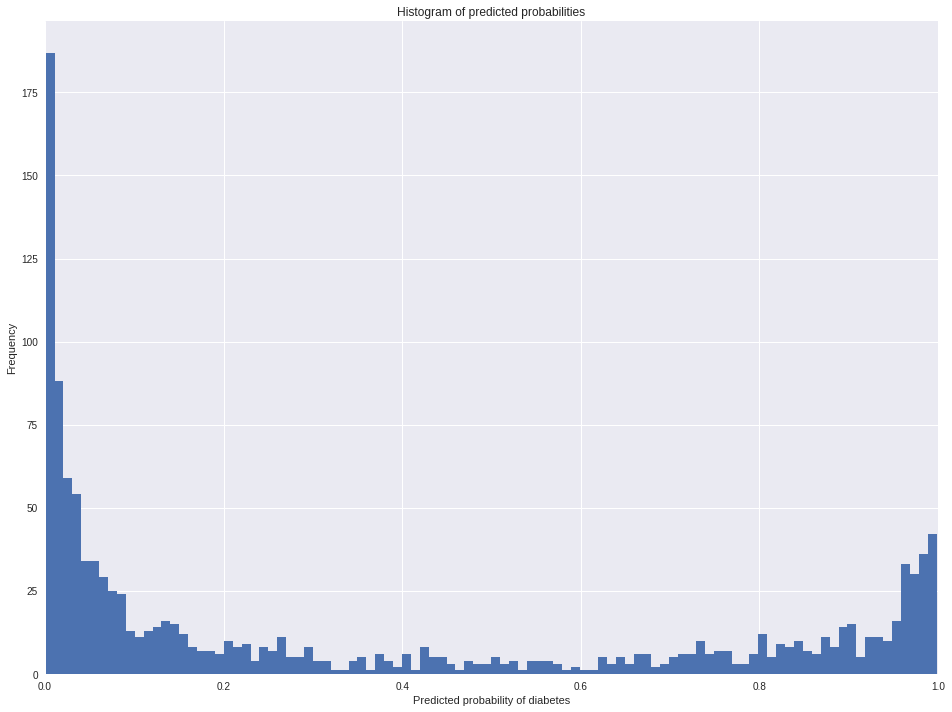

In [11]:
gbm_pred_prob = gbm.predict_proba(X_test)[:, 1]
plt.hist(gbm_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

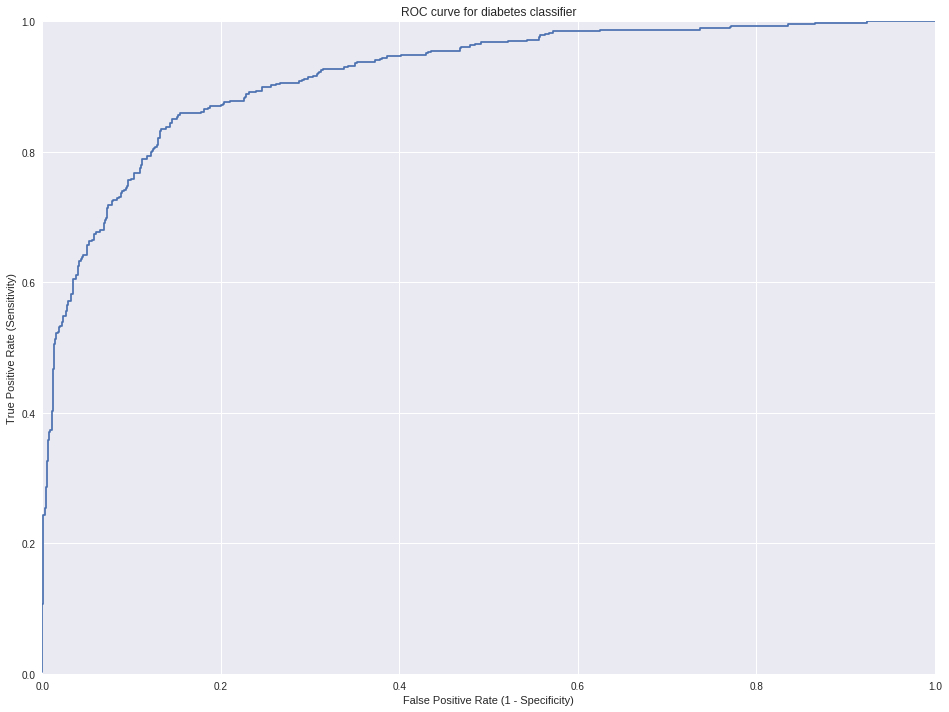

In [12]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, gbm_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [13]:
cross_val_score(gbm, X, y, cv=10, scoring='roc_auc').mean()

0.8080755124401854

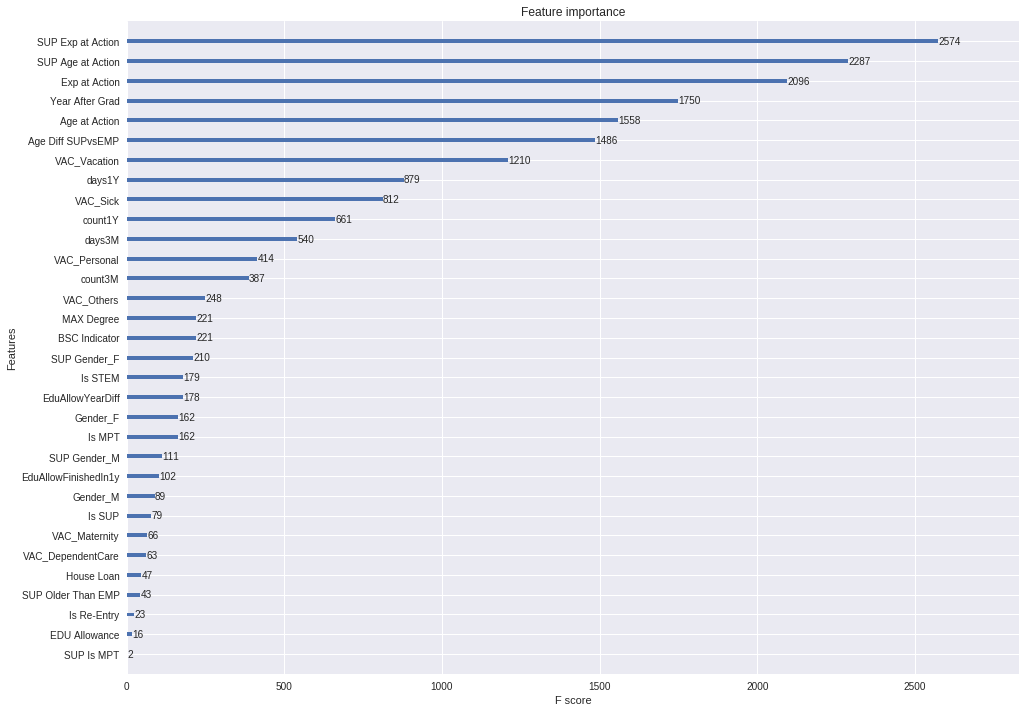

In [14]:
# fit model no training data
gbm = xgb.XGBClassifier(
        #silent=False, 
        #scale_pos_weight=1,
        #learning_rate=0.01,  
        #colsample_bytree = 0.4,
        #subsample = 0.8,
        #objective='binary:logistic', 
        #n_estimators=600, 
        #reg_alpha = 0.3,
        #max_depth=5, 
        #gamma=1
        
        # Best result with train-test dataset
        #learning_rate=0.05,  
        #n_estimators=450, 
        #max_depth=7, 
    
        #Best param from RandomSearch
        subsample = 0.8, 
        silent = 1, 
        objective = 'binary:logistic', 
        n_estimators = 450, 
        min_child_weight = 1, 
        max_depth = 7, 
        learning_rate = 0.04, 
        colsample_bytree = 0.5
).fit(X, y)

# plot feature importance
plot_importance(gbm)

plt.show()

# Load actual dataset to predict

In [15]:
uploaded = files.upload()

Saving PREPDATA2018.csv to PREPDATA2018.csv


In [16]:
df_pred = pd.read_csv('PREPDATA2018.csv')
df_pred.head()

,Serial Number,BSC Indicator,Resigned,Is MPT,Is Re-Entry,Exp at Action,Age at Action,SUP Is MPT,SUP Exp at Action,SUP Age at Action,Is SUP,SUP Gender_F,SUP Gender_M,Gender_F,Gender_M,SUP Older Than EMP,Age Diff SUPvsEMP,EduAllowFinishedIn1y,EduAllowYearDiff,EDU Allowance,House Loan,Is STEM,MAX Degree,Year After Grad,count3M,days3M,count1Y,days1Y,VAC_DependentCare,VAC_Maternity,VAC_Others,VAC_Personal,VAC_Sick,VAC_Vacation
0,357,1,0,1,0,37.306721,58.812980,1.0,32.477053,58.728105,0.0,1,0,1,0,0,-0.084875,NaN,NaN,0.0,0.0,0.0,1.0,38.147258,4.0,13.0,9.0,26.0,0.5,0.0,0.000,1.000000,1.000000,1.810787
1,368,0,0,1,0,36.838539,59.839696,1.0,8.586076,35.168416,0.0,1,0,0,1,0,-24.671280,NaN,NaN,0.0,0.0,0.0,1.0,37.922750,6.0,13.0,17.0,38.0,0.0,0.0,6.000,1.333333,1.531915,2.178218
2,371,0,0,1,0,37.063047,59.064868,1.0,32.559190,57.643894,1.0,0,1,0,1,0,-1.420974,NaN,NaN,0.0,0.0,0.0,1.0,38.177375,8.0,8.0,25.0,28.0,0.0,0.0,0.250,0.000000,6.666667,1.296482
3,378,0,0,0,0,36.896035,57.476882,1.0,26.062137,46.727859,0.0,0,1,0,1,0,-10.749023,NaN,NaN,0.0,1.0,0.0,1.0,38.393670,9.0,12.0,19.0,24.0,0.0,0.0,3.875,1.000000,6.897436,1.128319
4,414,0,0,1,0,34.089680,59.839696,1.0,27.425614,50.090009,0.0,0,1,0,1,0,-9.749687,NaN,NaN,0.0,0.0,1.0,1.0,37.509326,2.0,2.0,10.0,11.0,0.0,0.0,6.000,0.000000,0.000000,1.875000


In [0]:
X_pred = df_pred.drop('Resigned',axis=1)
X_pred = X_pred.drop('Serial Number',axis=1)
y_pred = df_pred['Resigned']

In [18]:
actual_predictions = gbm.predict(X_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [19]:
print("Predict result")
print(classification_report(y_pred,actual_predictions))
print(confusion_matrix(y_pred,actual_predictions))

Predict result
             precision    recall  f1-score   support

          0       0.99      0.82      0.89      2085
          1       0.11      0.67      0.18        69

avg / total       0.96      0.81      0.87      2154

[[1700  385]
 [  23   46]]


In [0]:
#eval_set = [(X_train, y_train), (X_test, y_test)]
#eval_metric = ["auc","error"]

#gbm = xgb.XGBClassifier(

        #learning_rate=0.05,  
        #n_estimators=450, 
        #max_depth=7, 
    
     # )

# %time gbm.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

# Grid Search

In [23]:
max_depth = np.arange(0.01,0.1,0.01)
print(max_depth)


'learning_rate': np.arange(0.01, 0.10, 0.010).tolist(),

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


In [49]:
parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [round(elem, 2) for elem in np.arange(0.01, 0.06, 0.01)], 
              'max_depth': list(range(5,8,1)),
              #'min_child_weight': list(range(1,10,1)),
              'silent': [1],
              #'subsample': [round(elem, 2) for elem in np.arange(0.5, 1.01, 0.1)],
              #'colsample_bytree': [round(elem, 2) for elem in np.arange(0.5, 1.01, 0.1)],
              'n_estimators': list(range(300,500,50)), 
}

print(parameters)

#grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

{'objective': ['binary:logistic'], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05], 'max_depth': [5, 6, 7], 'silent': [0], 'n_estimators': [300, 350, 400, 450]}


In [50]:
gbm = xgb.XGBClassifier()

clf = GridSearchCV(gbm, parameters, n_jobs=-1, 
                   cv=StratifiedKFold(y, n_folds=10, shuffle=True), 
                    scoring='roc_auc',
                   verbose=2, refit=True)

clf.fit(X, y)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] learning_rate=0.01, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 
[CV] learning_rate=0.01, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 -   3.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 -   3.5s
[CV] learning_rate=0.01, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 -   3.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 -   3.8s
[CV] learning_rate=0.01, max_depth=5, n_estimators=300, objectiv

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.4min


[CV]  learning_rate=0.01, max_depth=5, n_estimators=450, objective=binary:logistic, silent=0 -   4.6s
[CV] learning_rate=0.01, max_depth=5, n_estimators=450, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=450, objective=binary:logistic, silent=0 -   5.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.01, max_depth=5, n_estimators=450, objective=binary:logistic, silent=0 -   5.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 -   4.4s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.01, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 -   4.1s
[CV] learning_rate=0.01, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.01,

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  6.3min


[CV]  learning_rate=0.02, max_depth=5, n_estimators=450, objective=binary:logistic, silent=0 -   4.7s
[CV] learning_rate=0.02, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.02, max_depth=5, n_estimators=450, objective=binary:logistic, silent=0 -   4.7s
[CV] learning_rate=0.02, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.02, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 -   3.9s
[CV] learning_rate=0.02, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.02, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 -   3.9s
[CV] learning_rate=0.02, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.02, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 -   3.8s
[CV] learning_rate=0.02, max_depth=6, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.02,

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 14.8min


[CV]  learning_rate=0.04, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 -   3.4s
[CV] learning_rate=0.04, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.04, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 -   3.5s
[CV] learning_rate=0.04, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.04, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 -   3.2s
[CV] learning_rate=0.04, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.04, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 -   3.2s
[CV] learning_rate=0.04, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.04, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 -   3.4s
[CV] learning_rate=0.04, max_depth=5, n_estimators=300, objective=binary:logistic, silent=0 
[CV]  learning_rate=0.04,

[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 24.0min finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ... 0 0], n_folds=10, shuffle=True, random_state=None),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'objective': ['binary:logistic'], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05], 'max_depth': [5, 6, 7], 'silent': [0], 'n_estimators': [300, 350, 400, 450]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=2)

In [51]:
print(clf.best_score_)
print(clf.best_params_)

0.935519607109007
{'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 450, 'objective': 'binary:logistic', 'silent': 0}


In [27]:
parameters = {
              'objective':['binary:logistic'],
              'learning_rate': [round(elem, 2) for elem in np.arange(0.03, 0.06, 0.01)], 
              'max_depth': list(range(7,8,1)),
              'min_child_weight': list(range(1,10,1)),
              'silent': [1],
              'subsample': [round(elem, 2) for elem in np.arange(0.5, 1.01, 0.1)],
              'colsample_bytree': [round(elem, 2) for elem in np.arange(0.5, 1.01, 0.1)],
              'n_estimators': list(range(400,500,50)), 
}

print(parameters)

{'objective': ['binary:logistic'], 'learning_rate': [0.03, 0.04, 0.05], 'max_depth': [7], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'silent': [1], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'n_estimators': [400, 450]}


In [29]:
rnds = RandomizedSearchCV(
        gbm, 
        parameters, 
        n_jobs=-1, 
        cv=StratifiedKFold(y, n_folds=10, shuffle=True), 
        scoring='roc_auc', n_iter=30, random_state=5,
        verbose=2, refit=True, return_train_score=True
)

rnds.fit(X, y)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] subsample=1.0, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=9, max_depth=7, learning_rate=0.05, colsample_bytree=0.7 
[CV] subsample=1.0, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=9, max_depth=7, learning_rate=0.05, colsample_bytree=0.7 
[CV]  subsample=1.0, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=9, max_depth=7, learning_rate=0.05, colsample_bytree=0.7, total=   2.5s
[CV] subsample=1.0, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=9, max_depth=7, learning_rate=0.05, colsample_bytree=0.7 
[CV]  subsample=1.0, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=9, max_depth=7, learning_rate=0.05, colsample_bytree=0.7, total=   2.5s
[CV] subsample=1.0, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=9, max_depth=7, learning_rate=0.05, colsample_bytree=0.7 
[CV]  s

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.1min


[CV]  subsample=0.6, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=9, max_depth=7, learning_rate=0.03, colsample_bytree=0.6, total=   3.3s
[CV] subsample=0.6, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=9, max_depth=7, learning_rate=0.03, colsample_bytree=0.6 
[CV]  subsample=0.6, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=9, max_depth=7, learning_rate=0.03, colsample_bytree=0.6, total=   3.3s
[CV] subsample=0.8, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=6, max_depth=7, learning_rate=0.05, colsample_bytree=0.8 
[CV]  subsample=0.6, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=9, max_depth=7, learning_rate=0.03, colsample_bytree=0.6, total=   3.3s
[CV] subsample=0.8, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=6, max_depth=7, learning_rate=0.05, colsample_bytree=0.8 
[CV]  subsample=0.8, silent=1, objective=binary:logisti

[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.8min


[CV]  subsample=0.5, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=7, max_depth=7, learning_rate=0.04, colsample_bytree=0.5, total=   2.8s
[CV] subsample=0.9, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=6, max_depth=7, learning_rate=0.03, colsample_bytree=1.0 
[CV]  subsample=0.5, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=7, max_depth=7, learning_rate=0.04, colsample_bytree=0.5, total=   2.8s
[CV] subsample=0.9, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=6, max_depth=7, learning_rate=0.03, colsample_bytree=1.0 
[CV]  subsample=0.9, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=6, max_depth=7, learning_rate=0.03, colsample_bytree=1.0, total=   4.8s
[CV] subsample=0.9, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=6, max_depth=7, learning_rate=0.03, colsample_bytree=1.0 
[CV]  subsample=0.9, silent=1, objective=binary:logisti

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.1min finished


RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ... 0 0], n_folds=10, shuffle=True, random_state=None),
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.04, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=450,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.8),
          fit_params=None, iid=True, n_iter=30, n_jobs=-1,
          param_distributions={'objective': ['binary:logistic'], 'learning_rate': [0.03, 0.04, 0.05], 'max_depth': [7], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'silent': [1], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'n_estimators': [400, 450]},
          pre_dispatch='2*n_jobs', random_state=5, refit=T

In [30]:
print(rnds.best_score_)
print(rnds.best_params_)

0.9349147275586546
{'subsample': 0.8, 'silent': 1, 'objective': 'binary:logistic', 'n_estimators': 450, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.04, 'colsample_bytree': 0.5}


In [35]:
result = pd.DataFrame(rnds.cv_results_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

In [39]:

result[result['rank_test_score']==1]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bytree,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,param_objective,param_silent,param_subsample,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,split5_test_score,split5_train_score,split6_test_score,split6_train_score,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
7,3.087241,0.022996,0.934915,0.99999,0.5,0.04,7,1,450,binary:logistic,1,0.8,"{'subsample': 0.8, 'silent': 1, 'objective': '...",1,0.93834,0.999998,0.930739,0.999982,0.915247,0.999986,0.96322,0.999995,0.936804,0.999994,0.945815,0.999997,0.929116,0.999993,0.925826,0.999992,0.926933,0.999976,0.937112,0.99999,0.02759,0.00068,0.01234,0.000007


In [93]:
pd.DataFrame(rnds.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:1

,mean_test_score,std_test_score,params
0,0.923403,0.015911,"{'subsample': 1.0, 'silent': 1, 'objective': '..."
1,0.928205,0.015905,"{'subsample': 0.6, 'silent': 1, 'objective': '..."
2,0.913805,0.018239,"{'subsample': 0.5, 'silent': 1, 'objective': '..."
3,0.916020,0.017176,"{'subsample': 0.6, 'silent': 1, 'objective': '..."
4,0.925841,0.015453,"{'subsample': 0.8, 'silent': 1, 'objective': '..."
5,0.928797,0.015772,"{'subsample': 0.9, 'silent': 1, 'objective': '..."
6,0.922199,0.016496,"{'subsample': 0.6, 'silent': 1, 'objective': '..."
7,0.935351,0.015776,"{'subsample': 0.8, 'silent': 1, 'objective': '..."
8,0.932397,0.015572,"{'subsample': 0.9, 'silent': 1, 'objective': '..."
9,0.928652,0.015477,"{'subsample': 0.9, 'silent': 1, 'objective': '..."


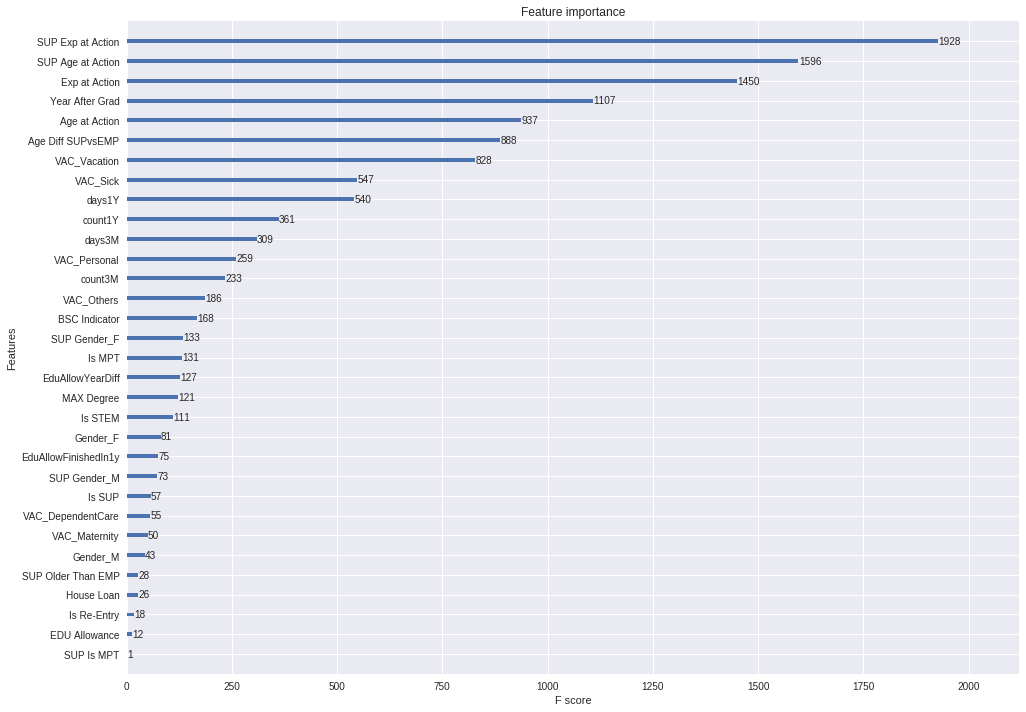

In [40]:
# fit model no training data -- 'subsample': 0.8, 'silent': 1, 'objective': 'binary:logistic', 'n_estimators': 450, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.04, 'colsample_bytree': 0.5
gbm = xgb.XGBClassifier(
        silent=False, 
        scale_pos_weight=1,
        learning_rate=0.04,  
        colsample_bytree = 0.5,
        subsample = 0.8,
        objective='binary:logistic', 
        n_estimators=450, 
        reg_alpha = 0.3,
        max_depth=7, 
        gamma=1,
        min_child_weight = 1,
).fit(X, y)

# plot feature importance
plot_importance(gbm)

plt.show()

In [41]:
X_pred = df_pred.drop('Resigned',axis=1)
X_pred = X_pred.drop('Serial Number',axis=1)
y_pred = df_pred['Resigned']

actual_predictions = gbm.predict(X_pred)

print("Predict result")
print(classification_report(y_pred,actual_predictions))
print(confusion_matrix(y_pred,actual_predictions))

Predict result
             precision    recall  f1-score   support

          0       0.99      0.82      0.90      2085
          1       0.11      0.68      0.19        69

avg / total       0.96      0.81      0.87      2154

[[1707  378]
 [  22   47]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [58]:
parameters = {
    'objective':['binary:logistic'],
    'silent': [1],

    'learning_rate': [round(elem, 2) for elem in np.arange(0.02, 0.05, 0.01)], 
    #'gamma ': list(range(1,20,5)),
    'max_depth': list(range(4,8,1)),
    'min_child_weight': list(range(1,10,1)),
    'max_delta_step': list(range(1,5,1)),
    'subsample': [round(elem, 2) for elem in np.arange(0.5, 1.01, 0.1)],
    'colsample_bytree': [round(elem, 2) for elem in np.arange(0.5, 1.01, 0.1)],
    'colsample_bylevel': [round(elem, 2) for elem in np.arange(0.5, 1.01, 0.1)],
    'n_estimators': list(range(400,500,50)), 
    
}

print(parameters)

'''
XGBClassifier(
  base_score=0.5, 
  booster='gbtree', 
  colsample_bylevel=1,
  colsample_bytree=0.5, 
  gamma=1, 
  learning_rate=0.04, 
  max_delta_step=0,
  max_depth=6, 
  min_child_weight=9, 
  missing=nan, 
  n_estimators=400,
  n_jobs=1, 
  nthread=None, 
  objective='binary:logistic', 
  random_state=0,
  reg_alpha=0.3, 
  reg_lambda=1, 
  scale_pos_weight=1, 
  seed=None,
  silent=1, 
  subsample=1.0
)
'''

{'objective': ['binary:logistic'], 'silent': [1], 'learning_rate': [0.02, 0.03, 0.04], 'max_depth': [4, 5, 6, 7], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_delta_step': [1, 2, 3, 4], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bylevel': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'n_estimators': [400, 450]}


"\nXGBClassifier(\n  base_score=0.5, \n  booster='gbtree', \n  colsample_bylevel=1,\n  colsample_bytree=0.5, \n  gamma=1, \n  learning_rate=0.04, \n  max_delta_step=0,\n  max_depth=6, \n  min_child_weight=9, \n  missing=nan, \n  n_estimators=400,\n  n_jobs=1, \n  nthread=None, \n  objective='binary:logistic', \n  random_state=0,\n  reg_alpha=0.3, \n  reg_lambda=1, \n  scale_pos_weight=1, \n  seed=None,\n  silent=1, \n  subsample=1.0\n)\n"

In [60]:
gbm = xgb.XGBClassifier()

rnds = RandomizedSearchCV(
        gbm, 
        parameters, 
        n_jobs=4, 
        cv=StratifiedKFold(y, n_folds=5, shuffle=True), 
        scoring='roc_auc', 
        n_iter=60, 
        #random_state=1001,
        verbose=2, 
        refit=True, 
        return_train_score=True
)

rnds.fit(X, y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] subsample=0.6, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=6, max_depth=5, max_delta_step=4, learning_rate=0.02, colsample_bytree=0.9, colsample_bylevel=1.0 
[CV] subsample=0.6, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=6, max_depth=5, max_delta_step=4, learning_rate=0.02, colsample_bytree=0.9, colsample_bylevel=1.0 
[CV] subsample=0.6, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=6, max_depth=5, max_delta_step=4, learning_rate=0.02, colsample_bytree=0.9, colsample_bylevel=1.0 
[CV] subsample=0.6, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=6, max_depth=5, max_delta_step=4, learning_rate=0.02, colsample_bytree=0.9, colsample_bylevel=1.0 
[CV]  subsample=0.6, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=6, max_depth=5, max_delta_step=4, learning_rate=0.02, colsample_bytree=0.9, colsa

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   43.3s


[CV]  subsample=0.7, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=2, max_depth=4, max_delta_step=3, learning_rate=0.02, colsample_bytree=0.8, colsample_bylevel=0.9, total=   4.1s
[CV] subsample=0.9, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=4, max_depth=6, max_delta_step=2, learning_rate=0.02, colsample_bytree=0.7, colsample_bylevel=0.9 
[CV]  subsample=0.7, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=2, max_depth=4, max_delta_step=3, learning_rate=0.02, colsample_bytree=0.8, colsample_bylevel=0.9, total=   4.0s
[CV] subsample=0.9, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=4, max_depth=6, max_delta_step=2, learning_rate=0.02, colsample_bytree=0.7, colsample_bylevel=0.9 
[CV]  subsample=0.9, silent=1, objective=binary:logistic, n_estimators=450, min_child_weight=4, max_depth=6, max_delta_step=2, learning_rate=0.02, colsample_bytree=0.7, colsample_bylevel=0.9, total=   5.5s


[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  3.2min


[CV]  subsample=0.8, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=9, max_depth=5, max_delta_step=3, learning_rate=0.03, colsample_bytree=0.6, colsample_bylevel=0.8, total=   3.4s
[CV] subsample=0.8, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=9, max_depth=5, max_delta_step=3, learning_rate=0.03, colsample_bytree=0.6, colsample_bylevel=0.8 
[CV]  subsample=0.8, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=9, max_depth=5, max_delta_step=3, learning_rate=0.03, colsample_bytree=0.6, colsample_bylevel=0.8, total=   3.6s
[CV] subsample=0.7, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=8, max_depth=4, max_delta_step=4, learning_rate=0.02, colsample_bytree=0.7, colsample_bylevel=0.6 
[CV]  subsample=0.8, silent=1, objective=binary:logistic, n_estimators=400, min_child_weight=9, max_depth=5, max_delta_step=3, learning_rate=0.03, colsample_bytree=0.6, colsample_bylevel=0.8, total=   3.6s


[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  6.2min finished


RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ... 0 0], n_folds=5, shuffle=True, random_state=None),
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=60, n_jobs=4,
          param_distributions={'objective': ['binary:logistic'], 'silent': [1], 'learning_rate': [0.02, 0.03, 0.04], 'max_depth': [4, 5, 6, 7], 'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'max_delta_step': [1, 2, 3, 4], 'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 'colsample_bylevel': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0

In [61]:
'''
estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
       '''

print(rnds.best_score_)
print(rnds.best_params_)

0.9272099134198518
{'subsample': 1.0, 'silent': 1, 'objective': 'binary:logistic', 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 7, 'max_delta_step': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8}


In [62]:
result = pd.DataFrame(rnds.cv_results_)
result

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_delta_step,param_max_depth,param_min_child_weight,param_n_estimators,param_objective,param_silent,param_subsample,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,6.303495,0.060047,0.912159,0.968192,1,0.9,0.02,4,5,6,450,binary:logistic,1,0.6,"{'subsample': 0.6, 'silent': 1, 'objective': '...",49,0.925184,0.966178,0.906372,0.968742,0.926164,0.968068,0.895819,0.969113,0.907236,0.968859,0.035457,0.004031,0.011750,0.001065
1,4.629187,0.066025,0.919205,0.993027,0.9,0.6,0.03,4,6,2,400,binary:logistic,1,0.5,"{'subsample': 0.5, 'silent': 1, 'objective': '...",20,0.933677,0.992399,0.912678,0.993042,0.928909,0.992790,0.906321,0.993210,0.914417,0.993695,0.040735,0.004076,0.010346,0.000431
2,3.763960,0.057469,0.916533,0.984585,0.9,0.5,0.04,2,5,7,450,binary:logistic,1,0.8,"{'subsample': 0.8, 'silent': 1, 'objective': '...",30,0.929832,0.983919,0.908206,0.985270,0.928932,0.984099,0.901516,0.985188,0.914163,0.984449,0.102031,0.001008,0.011234,0.000553
3,3.791034,0.065177,0.919729,0.988417,0.7,0.5,0.03,3,7,7,400,binary:logistic,1,0.9,"{'subsample': 0.9, 'silent': 1, 'objective': '...",19,0.934396,0.988110,0.914123,0.988746,0.930377,0.988314,0.905006,0.988778,0.914716,0.988136,0.072566,0.003322,0.010971,0.000291
4,3.144697,0.049100,0.909261,0.965641,0.7,0.6,0.04,1,5,9,400,binary:logistic,1,0.5,"{'subsample': 0.5, 'silent': 1, 'objective': '...",59,0.922241,0.965033,0.901166,0.966529,0.922251,0.964507,0.894704,0.966854,0.905929,0.965281,0.037731,0.004096,0.011187,0.000900
5,7.211769,0.063842,0.915810,0.985656,1,0.9,0.03,2,7,7,400,binary:logistic,1,0.6,"{'subsample': 0.6, 'silent': 1, 'objective': '...",33,0.930788,0.985160,0.910033,0.986273,0.927494,0.985552,0.900963,0.985499,0.909750,0.985795,0.017938,0.002604,0.011414,0.000369
6,3.894215,0.043094,0.911983,0.959070,0.9,0.8,0.02,3,4,2,400,binary:logistic,1,0.7,"{'subsample': 0.7, 'silent': 1, 'objective': '...",54,0.927921,0.956764,0.906983,0.959484,0.923619,0.958381,0.893928,0.961057,0.907436,0.959665,0.105981,0.002856,0.012337,0.001433
7,5.377742,0.074138,0.921113,0.987155,0.9,0.7,0.02,2,6,4,450,binary:logistic,1,0.9,"{'subsample': 0.9, 'silent': 1, 'objective': '...",12,0.936903,0.986170,0.915889,0.986985,0.933122,0.987609,0.905145,0.987836,0.914478,0.987176,0.102568,0.007461,0.011998,0.000578
8,3.391519,0.057704,0.916402,0.981412,0.5,0.8,0.04,4,5,8,450,binary:logistic,1,0.8,"{'subsample': 0.8, 'silent': 1, 'objective': '...",31,0.929901,0.980777,0.907449,0.982517,0.929093,0.980435,0.903446,0.982212,0.912110,0.981121,0.117280,0.008945,0.011043,0.000813
9,3.525479,0.064361,0.911232,0.975002,0.5,0.8,0.03,3,6,6,400,binary:logistic,1,0.5,"{'subsample': 0.5, 'silent': 1, 'objective': '...",55,0.922387,0.974175,0.904545,0.975633,0.926733,0.973708,0.896319,0.976192,0.906167,0.975303,0.082064,0.005070,0.011465,0.000923


In [63]:
result[result['rank_test_score']==1]

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_colsample_bylevel,param_colsample_bytree,param_learning_rate,param_max_delta_step,param_max_depth,param_min_child_weight,param_n_estimators,param_objective,param_silent,param_subsample,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
45,4.945545,0.070228,0.92721,0.997882,0.8,0.7,0.03,3,7,3,400,binary:logistic,1,1,"{'subsample': 1.0, 'silent': 1, 'objective': '...",1,0.942851,0.997865,0.921576,0.998002,0.938434,0.997679,0.912279,0.998,0.920882,0.997863,0.035394,0.00129,0.011536,0.000118


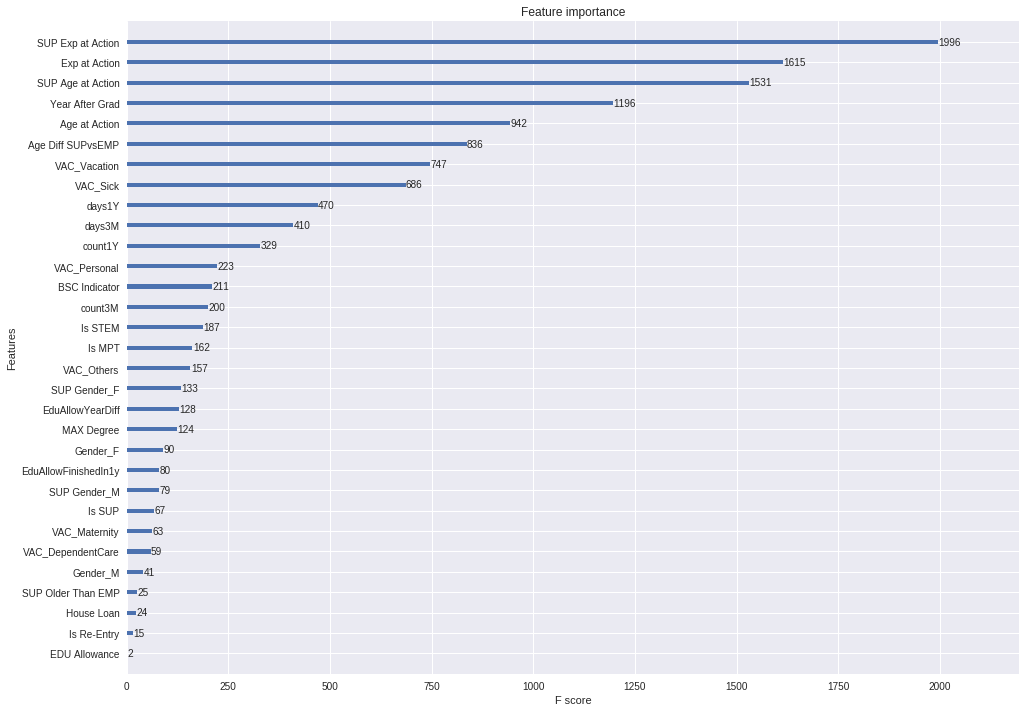

In [65]:
# fit model no training data -- {'subsample': 1.0, 'silent': 1, 'objective': 'binary:logistic', 'n_estimators': 400, 'min_child_weight': 3, 'max_depth': 7, 'max_delta_step': 3, 'learning_rate': 0.03, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.8}
gbm = xgb.XGBClassifier(   
  base_score=0.5,
  booster='gbtree',
  colsample_bylevel=0.8,
  colsample_bytree=0.7,
  gamma=0,
  learning_rate=0.03,
  max_delta_step=3,
  max_depth=7,
  min_child_weight=3,
  missing=None,
  n_estimators=400,
  n_jobs=1,
  nthread=None,
  objective='binary:logistic',
  random_state=0,
  reg_alpha=0,
  reg_lambda=1,
  scale_pos_weight=1,
  seed=None,
  silent=True,
  subsample=1 
).fit(X, y)

# plot feature importance
plot_importance(gbm)

plt.show()

In [66]:
X_pred = df_pred.drop('Resigned',axis=1)
X_pred = X_pred.drop('Serial Number',axis=1)
y_pred = df_pred['Resigned']

actual_predictions = gbm.predict(X_pred)

print("Predict result")
print(classification_report(y_pred,actual_predictions))
print(confusion_matrix(y_pred,actual_predictions))

Predict result
             precision    recall  f1-score   support

          0       0.99      0.84      0.91      2085
          1       0.13      0.71      0.22        69

avg / total       0.96      0.84      0.89      2154

[[1750  335]
 [  20   49]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [70]:
'''
RandomizedSearchCV(
  cv=sklearn.cross_validation.StratifiedKFold(
    labels=[0 0 ... 0 0], 
    n_folds=5, 
    shuffle=True, 
    random_state=None),
  error_score='raise',
  estimator=XGBClassifier(
    base_score=0.5, 
    booster='gbtree', 
    colsample_bylevel=1,
    colsample_bytree=1, 
    gamma=0, 
    learning_rate=0.1, 
    max_delta_step=0,
    max_depth=3, 
    min_child_weight=1, 
    missing=None, 
    n_estimators=100,
    n_jobs=1, 
    nthread=None, 
    objective='binary:logistic', 
    random_state=0,
    reg_alpha=0, 
    reg_lambda=1, 
    scale_pos_weight=1, 
    seed=None,
    silent=True, 
    subsample=1),
  fit_params=None, 
  iid=True, 
  n_iter=60, 
  n_jobs=4,
  param_distributions={
    'objective': ['binary:logistic'], 
    'silent': [1], 
    'learning_rate': [0.02, 0.03, 0.04], 
    'max_depth': [4, 5, 6, 7], 
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9], 
    'max_delta_step': [1, 2, 3, 4], 
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
    'colsample_bylevel': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], 
    'n_estimators': [400, 450]},
  pre_dispatch='2*n_jobs', 
  random_state=None, 
  refit=True,
  return_train_score=True, 
  scoring='roc_auc', 
  verbose=2)
'''

one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

parameters = {
    'objective':['binary:logistic'],
    'silent': [1],
    'learning_rate': [round(elem, 2) for elem in np.arange(0.02, 0.05, 0.01)], 
    'gamma': [0, 0.25, 0.5, 1.0],
    'max_depth': [7],
    'reg_alpha': from_zero_positive,
    "min_child_weight": from_zero_positive,
    'max_delta_step': list(range(1,5,1)),
    'subsample': one_to_left,
    'colsample_bytree': one_to_left,
    'colsample_bylevel': one_to_left,
    'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    'n_estimators': [400], 
    
}

print(parameters)

'''
XGBClassifier(
  base_score=0.5, 
  booster='gbtree', 
  colsample_bylevel=1,
  colsample_bytree=0.5, 
  gamma=1, 
  learning_rate=0.04, 
  max_delta_step=0,
  max_depth=6, 
  min_child_weight=9, 
  missing=nan, 
  n_estimators=400,
  n_jobs=1, 
  nthread=None, 
  objective='binary:logistic', 
  random_state=0,
  reg_alpha=0.3, 
  reg_lambda=1, 
  scale_pos_weight=1, 
  seed=None,
  silent=1, 
  subsample=1.0
)
'''

{'objective': ['binary:logistic'], 'silent': [1], 'learning_rate': [0.02, 0.03, 0.04], 'gamma': [0, 0.25, 0.5, 1.0], 'max_depth': [7], 'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff294b804e0>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff294b804e0>, 'max_delta_step': [1, 2, 3, 4], 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff294b80ba8>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff294b80ba8>, 'colsample_bylevel': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff294b80ba8>, 'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], 'n_estimators': [400]}


"\nXGBClassifier(\n  base_score=0.5, \n  booster='gbtree', \n  colsample_bylevel=1,\n  colsample_bytree=0.5, \n  gamma=1, \n  learning_rate=0.04, \n  max_delta_step=0,\n  max_depth=6, \n  min_child_weight=9, \n  missing=nan, \n  n_estimators=400,\n  n_jobs=1, \n  nthread=None, \n  objective='binary:logistic', \n  random_state=0,\n  reg_alpha=0.3, \n  reg_lambda=1, \n  scale_pos_weight=1, \n  seed=None,\n  silent=1, \n  subsample=1.0\n)\n"

In [74]:
gbm = xgb.XGBClassifier()

rnds = RandomizedSearchCV(
        gbm, 
        parameters, 
        n_jobs=4, 
        cv=StratifiedKFold(y, n_folds=4, shuffle=True), 
        scoring='roc_auc', 
        n_iter=200, 
        #random_state=1001,
        verbose=2, 
        refit=True, 
        return_train_score=True
)

rnds.fit(X, y)

'''
RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ... 0 0], n_folds=4, shuffle=True, random_state=None),
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=60, n_jobs=4,
          param_distributions={'objective': ['binary:logistic'], 'silent': [1], 'learning_rate': [0.02, 0.03, 0.04], 'gamma': [0, 0.25, 0.5, 1.0], 'max_depth': [7], 'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff294b804e0>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_fr... object at 0x7ff294b80ba8>, 'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0], 'n_estimators': [400]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score=True, scoring='roc_auc', verbose=1)
'''

Fitting 4 folds for each of 200 candidates, totalling 800 fits
[CV] colsample_bylevel=0.9977081077654862, colsample_bytree=0.9402071059445035, gamma=0.25, learning_rate=0.04, max_delta_step=1, max_depth=7, min_child_weight=105.36321824379216, n_estimators=400, objective=binary:logistic, reg_alpha=63.79919958753004, reg_lambda=10.0, silent=1, subsample=0.9480574967139211 
[CV] colsample_bylevel=0.9977081077654862, colsample_bytree=0.9402071059445035, gamma=0.25, learning_rate=0.04, max_delta_step=1, max_depth=7, min_child_weight=105.36321824379216, n_estimators=400, objective=binary:logistic, reg_alpha=63.79919958753004, reg_lambda=10.0, silent=1, subsample=0.9480574967139211 
[CV] colsample_bylevel=0.9977081077654862, colsample_bytree=0.9402071059445035, gamma=0.25, learning_rate=0.04, max_delta_step=1, max_depth=7, min_child_weight=105.36321824379216, n_estimators=400, objective=binary:logistic, reg_alpha=63.79919958753004, reg_lambda=10.0, silent=1, subsample=0.9480574967139211 
[CV]

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   24.9s


[CV]  colsample_bylevel=0.9870908723245696, colsample_bytree=0.8973989005624202, gamma=0.25, learning_rate=0.04, max_delta_step=4, max_depth=7, min_child_weight=84.56085672846632, n_estimators=400, objective=binary:logistic, reg_alpha=23.075243677922465, reg_lambda=0.1, silent=1, subsample=0.9765796373201674, total=   2.9s
[CV] colsample_bylevel=0.9598517084999783, colsample_bytree=0.7392416802932219, gamma=0.5, learning_rate=0.02, max_delta_step=1, max_depth=7, min_child_weight=28.216305313064577, n_estimators=400, objective=binary:logistic, reg_alpha=179.642218864313, reg_lambda=100.0, silent=1, subsample=0.9157125650839959 
[CV]  colsample_bylevel=0.9598517084999783, colsample_bytree=0.7392416802932219, gamma=0.5, learning_rate=0.02, max_delta_step=1, max_depth=7, min_child_weight=28.216305313064577, n_estimators=400, objective=binary:logistic, reg_alpha=179.642218864313, reg_lambda=100.0, silent=1, subsample=0.9157125650839959, total=   2.1s
[CV]  colsample_bylevel=0.95985170849997

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.0min


[CV]  colsample_bylevel=0.6876816845559509, colsample_bytree=0.8865791792713611, gamma=0.5, learning_rate=0.04, max_delta_step=4, max_depth=7, min_child_weight=31.184580837945163, n_estimators=400, objective=binary:logistic, reg_alpha=98.91224623300168, reg_lambda=1.0, silent=1, subsample=0.8813655647221796, total=   1.6s
[CV] colsample_bylevel=0.8907006303605534, colsample_bytree=0.9385561105299847, gamma=0.5, learning_rate=0.03, max_delta_step=1, max_depth=7, min_child_weight=92.90400278989885, n_estimators=400, objective=binary:logistic, reg_alpha=10.77051380202961, reg_lambda=10.0, silent=1, subsample=0.8382477564849263 
[CV]  colsample_bylevel=0.6876816845559509, colsample_bytree=0.8865791792713611, gamma=0.5, learning_rate=0.04, max_delta_step=4, max_depth=7, min_child_weight=31.184580837945163, n_estimators=400, objective=binary:logistic, reg_alpha=98.91224623300168, reg_lambda=1.0, silent=1, subsample=0.8813655647221796, total=   1.7s
[CV] colsample_bylevel=0.8907006303605534, 

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  4.9min


[CV]  colsample_bylevel=0.9107726379239104, colsample_bytree=0.9731747638343031, gamma=0.25, learning_rate=0.04, max_delta_step=1, max_depth=7, min_child_weight=8.167435978603308, n_estimators=400, objective=binary:logistic, reg_alpha=109.04102826646952, reg_lambda=10.0, silent=1, subsample=0.9526072691298888, total=   2.3s
[CV] colsample_bylevel=0.959634096066269, colsample_bytree=0.8933205521329469, gamma=0.5, learning_rate=0.04, max_delta_step=2, max_depth=7, min_child_weight=39.07928023462097, n_estimators=400, objective=binary:logistic, reg_alpha=61.78056833110387, reg_lambda=5.0, silent=1, subsample=0.9836354706742824 
[CV]  colsample_bylevel=0.9107726379239104, colsample_bytree=0.9731747638343031, gamma=0.25, learning_rate=0.04, max_delta_step=1, max_depth=7, min_child_weight=8.167435978603308, n_estimators=400, objective=binary:logistic, reg_alpha=109.04102826646952, reg_lambda=10.0, silent=1, subsample=0.9526072691298888, total=   2.3s
[CV] colsample_bylevel=0.959634096066269,

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  8.6min


[CV]  colsample_bylevel=0.956312439801405, colsample_bytree=0.9620544104936052, gamma=0.5, learning_rate=0.02, max_delta_step=4, max_depth=7, min_child_weight=34.568862998882096, n_estimators=400, objective=binary:logistic, reg_alpha=5.887391313771991, reg_lambda=0.1, silent=1, subsample=0.9837425723006267, total=   4.7s
[CV] colsample_bylevel=0.858614166505599, colsample_bytree=0.7559487126353117, gamma=0, learning_rate=0.04, max_delta_step=3, max_depth=7, min_child_weight=7.324314632575883, n_estimators=400, objective=binary:logistic, reg_alpha=14.904032836625355, reg_lambda=10.0, silent=1, subsample=0.9391925431914045 
[CV]  colsample_bylevel=0.956312439801405, colsample_bytree=0.9620544104936052, gamma=0.5, learning_rate=0.02, max_delta_step=4, max_depth=7, min_child_weight=34.568862998882096, n_estimators=400, objective=binary:logistic, reg_alpha=5.887391313771991, reg_lambda=0.1, silent=1, subsample=0.9837425723006267, total=   4.8s
[CV] colsample_bylevel=0.858614166505599, colsa

[Parallel(n_jobs=4)]: Done 800 out of 800 | elapsed: 10.7min finished


"\nRandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ... 0 0], n_folds=4, shuffle=True, random_state=None),\n          error_score='raise',\n          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,\n       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,\n       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,\n       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,\n       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,\n       silent=True, subsample=1),\n          fit_params=None, iid=True, n_iter=60, n_jobs=4,\n          param_distributions={'objective': ['binary:logistic'], 'silent': [1], 'learning_rate': [0.02, 0.03, 0.04], 'gamma': [0, 0.25, 0.5, 1.0], 'max_depth': [7], 'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff294b804e0>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_fr... object at 0x7ff294b80ba8>, 'reg_lambda': [0.1,

In [75]:
print(rnds.best_score_)
print(rnds.best_params_)

'''
n_iter=60
===========
0.9180532872089079
{'colsample_bylevel': 0.986994151548106, 'colsample_bytree': 0.926622692275059, 'gamma': 0.5, 'learning_rate': 0.04, 'max_delta_step': 4, 'max_depth': 7, 'min_child_weight': 10.905267092179805, 'n_estimators': 400, 'objective': 'binary:logistic', 'reg_alpha': 1.7494793372639939, 'reg_lambda': 1.0, 'silent': 1, 'subsample': 0.9961244970278429}

n_iter=200
===========
0.9194402717193616
{'colsample_bylevel': 0.9993315801125808, 'colsample_bytree': 0.9532922492885516, 'gamma': 0.25, 'learning_rate': 0.03, 'max_delta_step': 4, 'max_depth': 7, 'min_child_weight': 4.284782165551039, 'n_estimators': 400, 'objective': 'binary:logistic', 'reg_alpha': 2.8491612140492317, 'reg_lambda': 1.0, 'silent': 1, 'subsample': 0.8834501868513965}
'''

0.9194402717193616
{'colsample_bylevel': 0.9993315801125808, 'colsample_bytree': 0.9532922492885516, 'gamma': 0.25, 'learning_rate': 0.03, 'max_delta_step': 4, 'max_depth': 7, 'min_child_weight': 4.284782165551039, 'n_estimators': 400, 'objective': 'binary:logistic', 'reg_alpha': 2.8491612140492317, 'reg_lambda': 1.0, 'silent': 1, 'subsample': 0.8834501868513965}


"\nn_iter=60\n===========\n0.9180532872089079\n{'colsample_bylevel': 0.986994151548106, 'colsample_bytree': 0.926622692275059, 'gamma': 0.5, 'learning_rate': 0.04, 'max_delta_step': 4, 'max_depth': 7, 'min_child_weight': 10.905267092179805, 'n_estimators': 400, 'objective': 'binary:logistic', 'reg_alpha': 1.7494793372639939, 'reg_lambda': 1.0, 'silent': 1, 'subsample': 0.9961244970278429}\n"

In [76]:
X_pred = df_pred.drop('Resigned',axis=1)
X_pred = X_pred.drop('Serial Number',axis=1)
y_pred = df_pred['Resigned']

actual_predictions = rnds.predict(X_pred)

print("Predict result")
print(classification_report(y_pred,actual_predictions))
print(confusion_matrix(y_pred,actual_predictions))

Predict result
             precision    recall  f1-score   support

          0       0.99      0.84      0.91      2085
          1       0.14      0.75      0.23        69

avg / total       0.96      0.84      0.89      2154

[[1752  333]
 [  17   52]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [78]:
rnds.best_params_

{'colsample_bylevel': 0.9993315801125808,
 'colsample_bytree': 0.9532922492885516,
 'gamma': 0.25,
 'learning_rate': 0.03,
 'max_delta_step': 4,
 'max_depth': 7,
 'min_child_weight': 4.284782165551039,
 'n_estimators': 400,
 'objective': 'binary:logistic',
 'reg_alpha': 2.8491612140492317,
 'reg_lambda': 1.0,
 'silent': 1,
 'subsample': 0.8834501868513965}

In [85]:
uni = st.uniform(0, 10)
one_to_left = st.beta(10, 1)  
from_zero_positive = st.expon(0, 50)

parameters = {
  'objective':['binary:logistic'],
  'silent': [1],
  'learning_rate': st.uniform(0.01, 0.05), 
  'gamma': uni,
  'max_depth': [7],
  'reg_alpha': from_zero_positive,
  "min_child_weight": from_zero_positive,
  'max_delta_step': from_zero_positive,
  'subsample': one_to_left,
  'colsample_bytree': one_to_left,
  'colsample_bylevel': one_to_left,
  'reg_lambda': from_zero_positive,
  'n_estimators': [400], 

}

print(parameters)
  
  

{'objective': ['binary:logistic'], 'silent': [1], 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29a1f2e10>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29773f860>, 'max_depth': [7], 'reg_alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29773f4e0>, 'min_child_weight': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29773f4e0>, 'max_delta_step': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29773f4e0>, 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29773fe48>, 'colsample_bytree': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29773fe48>, 'colsample_bylevel': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29773fe48>, 'reg_lambda': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29773f4e0>, 'n_estimators': [400]}


In [86]:
gbm = xgb.XGBClassifier()

rnds = RandomizedSearchCV(
        gbm, 
        parameters, 
        n_jobs=4, 
        cv=StratifiedKFold(y, n_folds=4, shuffle=True), 
        scoring='roc_auc', 
        n_iter=300, 
        #random_state=1001,
        verbose=2, 
        refit=True, 
        return_train_score=True
)

rnds.fit(X, y)


Fitting 4 folds for each of 300 candidates, totalling 1200 fits
[CV] colsample_bylevel=0.9212877755775245, colsample_bytree=0.798838021988612, gamma=4.91409758164029, learning_rate=0.031002115772818174, max_delta_step=56.411596207302814, max_depth=7, min_child_weight=135.62789555986316, n_estimators=400, objective=binary:logistic, reg_alpha=86.87647528438835, reg_lambda=37.35320771405146, silent=1, subsample=0.9938820227003545 
[CV] colsample_bylevel=0.9212877755775245, colsample_bytree=0.798838021988612, gamma=4.91409758164029, learning_rate=0.031002115772818174, max_delta_step=56.411596207302814, max_depth=7, min_child_weight=135.62789555986316, n_estimators=400, objective=binary:logistic, reg_alpha=86.87647528438835, reg_lambda=37.35320771405146, silent=1, subsample=0.9938820227003545 
[CV] colsample_bylevel=0.9212877755775245, colsample_bytree=0.798838021988612, gamma=4.91409758164029, learning_rate=0.031002115772818174, max_delta_step=56.411596207302814, max_depth=7, min_child_wei

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   33.0s


[CV]  colsample_bylevel=0.9532903335381849, colsample_bytree=0.9869412777856368, gamma=9.29835922063322, learning_rate=0.05589440155360328, max_delta_step=36.037250761304286, max_depth=7, min_child_weight=2.7096631588148634, n_estimators=400, objective=binary:logistic, reg_alpha=20.22303542158067, reg_lambda=46.40690946523718, silent=1, subsample=0.7412604489416896, total=   7.0s
[CV] colsample_bylevel=0.9716531505275998, colsample_bytree=0.8965339678140963, gamma=2.56359766974, learning_rate=0.019058456725657466, max_delta_step=0.8482706668901394, max_depth=7, min_child_weight=55.673848127547785, n_estimators=400, objective=binary:logistic, reg_alpha=56.24649935344605, reg_lambda=19.314735362055043, silent=1, subsample=0.8418714809347037 
[CV]  colsample_bylevel=0.9532903335381849, colsample_bytree=0.9869412777856368, gamma=9.29835922063322, learning_rate=0.05589440155360328, max_delta_step=36.037250761304286, max_depth=7, min_child_weight=2.7096631588148634, n_estimators=400, objecti

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.1min


[CV]  colsample_bylevel=0.9664812704414523, colsample_bytree=0.6689533492694385, gamma=1.019215500001328, learning_rate=0.057259516652823, max_delta_step=168.37553840253113, max_depth=7, min_child_weight=17.464377402264454, n_estimators=400, objective=binary:logistic, reg_alpha=188.94277834398966, reg_lambda=43.70198659218524, silent=1, subsample=0.9481721569689491, total=   2.1s
[CV] colsample_bylevel=0.8828835631275674, colsample_bytree=0.9777502321296341, gamma=3.5355287710135705, learning_rate=0.048426053408055024, max_delta_step=62.18893610559505, max_depth=7, min_child_weight=105.43731680037891, n_estimators=400, objective=binary:logistic, reg_alpha=81.7440619643001, reg_lambda=9.255389565772557, silent=1, subsample=0.9843780718570113 
[CV]  colsample_bylevel=0.9664812704414523, colsample_bytree=0.6689533492694385, gamma=1.019215500001328, learning_rate=0.057259516652823, max_delta_step=168.37553840253113, max_depth=7, min_child_weight=17.464377402264454, n_estimators=400, object

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  5.0min


[CV]  colsample_bylevel=0.9414731953624118, colsample_bytree=0.9331507061999633, gamma=5.403078337842127, learning_rate=0.04124451878148138, max_delta_step=15.15257877936938, max_depth=7, min_child_weight=53.356173610669074, n_estimators=400, objective=binary:logistic, reg_alpha=59.7122207846371, reg_lambda=51.825413233359185, silent=1, subsample=0.5884772113290632, total=   2.7s
[CV] colsample_bylevel=0.994222097535753, colsample_bytree=0.9925270323754515, gamma=4.742713551045201, learning_rate=0.034418305531023693, max_delta_step=23.544107843066637, max_depth=7, min_child_weight=4.241377748769579, n_estimators=400, objective=binary:logistic, reg_alpha=108.4602657488297, reg_lambda=7.276785764691021, silent=1, subsample=0.9513978442661593 
[CV]  colsample_bylevel=0.9414731953624118, colsample_bytree=0.9331507061999633, gamma=5.403078337842127, learning_rate=0.04124451878148138, max_delta_step=15.15257877936938, max_depth=7, min_child_weight=53.356173610669074, n_estimators=400, object

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  9.1min


[CV]  colsample_bylevel=0.769022211958088, colsample_bytree=0.9813648199607311, gamma=3.6260633507785767, learning_rate=0.042475192543047144, max_delta_step=96.35648711041252, max_depth=7, min_child_weight=32.410053250149964, n_estimators=400, objective=binary:logistic, reg_alpha=13.451353309288066, reg_lambda=8.165668190271546, silent=1, subsample=0.8707084635203416, total=   4.6s
[CV]  colsample_bylevel=0.769022211958088, colsample_bytree=0.9813648199607311, gamma=3.6260633507785767, learning_rate=0.042475192543047144, max_delta_step=96.35648711041252, max_depth=7, min_child_weight=32.410053250149964, n_estimators=400, objective=binary:logistic, reg_alpha=13.451353309288066, reg_lambda=8.165668190271546, silent=1, subsample=0.8707084635203416, total=   4.5s
[CV] colsample_bylevel=0.9818634788607422, colsample_bytree=0.9489682924455893, gamma=1.987795066094561, learning_rate=0.037541669660795175, max_delta_step=129.9829617019852, max_depth=7, min_child_weight=10.563895314263684, n_est

[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 14.3min


[CV]  colsample_bylevel=0.8874157361991096, colsample_bytree=0.8496613408518258, gamma=1.742032224569574, learning_rate=0.02677803909245497, max_delta_step=4.519126704071116, max_depth=7, min_child_weight=66.96917719025241, n_estimators=400, objective=binary:logistic, reg_alpha=160.29683957923982, reg_lambda=41.05533344161689, silent=1, subsample=0.9486501676798383, total=   2.4s
[CV] colsample_bylevel=0.9046808319989658, colsample_bytree=0.9175074349100306, gamma=3.2663824480412096, learning_rate=0.0313647919282057, max_delta_step=96.98510178186662, max_depth=7, min_child_weight=22.591530717705126, n_estimators=400, objective=binary:logistic, reg_alpha=54.33583340492214, reg_lambda=108.9313598310828, silent=1, subsample=0.906791799993872 
[CV]  colsample_bylevel=0.8874157361991096, colsample_bytree=0.8496613408518258, gamma=1.742032224569574, learning_rate=0.02677803909245497, max_delta_step=4.519126704071116, max_depth=7, min_child_weight=66.96917719025241, n_estimators=400, objectiv

[Parallel(n_jobs=4)]: Done 1200 out of 1200 | elapsed: 17.3min finished


RandomizedSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[0 0 ... 0 0], n_folds=4, shuffle=True, random_state=None),
          error_score='raise',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=300, n_jobs=4,
          param_distributions={'objective': ['binary:logistic'], 'silent': [1], 'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29a1f2e10>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7ff29773f860>, 'max_depth': [7], 'reg_alpha': <scipy.stats._distn_infrastru...bda': <scipy.stats._distn_infrastructure.rv_frozen object 

In [87]:
print(rnds.best_score_)
print(rnds.best_params_)

0.903967494428214
{'colsample_bylevel': 0.9481694256882321, 'colsample_bytree': 0.9971151877702138, 'gamma': 0.867712167501713, 'learning_rate': 0.03652110108880578, 'max_delta_step': 122.20272781691719, 'max_depth': 7, 'min_child_weight': 2.371654454709253, 'n_estimators': 400, 'objective': 'binary:logistic', 'reg_alpha': 9.856605502910584, 'reg_lambda': 13.32282675091245, 'silent': 1, 'subsample': 0.9424097622004056}


In [88]:
X_pred = df_pred.drop('Resigned',axis=1)
X_pred = X_pred.drop('Serial Number',axis=1)
y_pred = df_pred['Resigned']

actual_predictions = rnds.predict(X_pred)

print("Predict result")
print(classification_report(y_pred,actual_predictions))
print(confusion_matrix(y_pred,actual_predictions))

Predict result
             precision    recall  f1-score   support

          0       0.99      0.85      0.91      2085
          1       0.14      0.74      0.23        69

avg / total       0.96      0.84      0.89      2154

[[1764  321]
 [  18   51]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [89]:
rnds.best_params_

{'colsample_bylevel': 0.9481694256882321,
 'colsample_bytree': 0.9971151877702138,
 'gamma': 0.867712167501713,
 'learning_rate': 0.03652110108880578,
 'max_delta_step': 122.20272781691719,
 'max_depth': 7,
 'min_child_weight': 2.371654454709253,
 'n_estimators': 400,
 'objective': 'binary:logistic',
 'reg_alpha': 9.856605502910584,
 'reg_lambda': 13.32282675091245,
 'silent': 1,
 'subsample': 0.9424097622004056}

In [0]:
gbm = xgb.XGBClassifier(
  colsample_bylevel = 0.9481694256882321,
  colsample_bytree = 0.9971151877702138,
  gamma = 0.867712167501713,
  learning_rate = 0.03652110108880578,
  max_delta_step = 122.20272781691719,
  max_depth = 7,
  min_child_weight = 2.371654454709253,
  n_estimators = 400,
  objective = 'binary:logistic',
  reg_alpha = 9.856605502910584,
  reg_lambda = 13.32282675091245,
  silent = 1,
  subsample = 0.9424097622004056
).fit(X_train, y_train)

In [98]:
predictions = gbm.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [99]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.82      0.89      0.86       757
          1       0.80      0.68      0.74       469

avg / total       0.81      0.81      0.81      1226

[[677  80]
 [148 321]]
